In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

def qft_rotations(qc):
    # qc.h(2)
    # qc.cp(pi/2, 2, 1)
    qc.h(1)
    qc.cp(pi/2, 1, 0)
    qc.h(0)
    return qc

# qc=QuantumCircuit(2)
# qft_rotations(qc)
# qc.draw('mpl')


In [2]:
def draper_adder(circuit, n):
    for i in range(n):
        for j in range(i,n):
            circuit.cp(pi/(2**(j-i)), i, j+n)

In [3]:
def value1 (circuit, a, b):
    if a == 1:
        circuit.x(0)
    if b == 1:
        circuit.x(1)

In [4]:
def value2 (circuit, a, b):
    if a == 1:
        circuit.x(2)
    if b == 1:
        circuit.x(3)

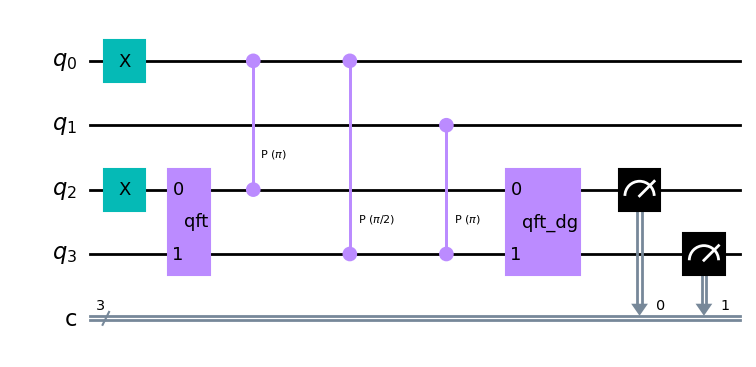

In [5]:
qc=QuantumCircuit(4,3)
value1(qc,1,0)
value2(qc,1,0)
qft=QuantumCircuit(2,name='qft')
qft=qft_rotations(qft)
qfti=qft.inverse()
qc.append(qft,[2,3])
draper_adder(qc,2)
qc.append(qfti,[2,3])
qc.measure(2,0)
qc.measure(3,1)
qc.draw('mpl')

{'010': 20000}


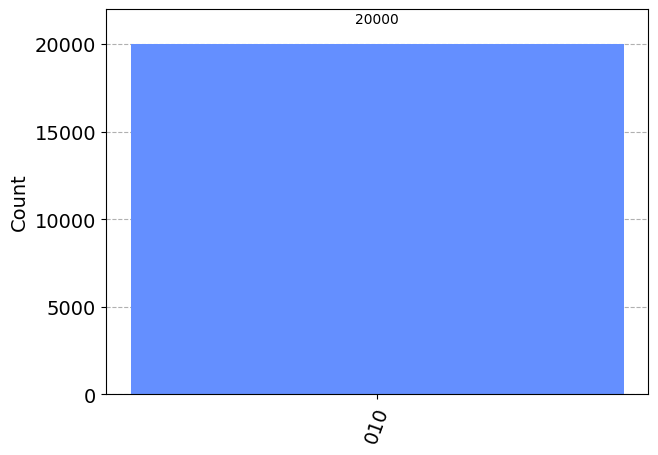

In [6]:
#executing on simulator and plotting histogram
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=20000)
result = job.result()
counts = result.get_counts()
#reverse output
counts = {k[::-1]: v for k,v in counts.items()}
print(counts)
plot_histogram(counts)